In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2, SimpleSetting
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

# Settings

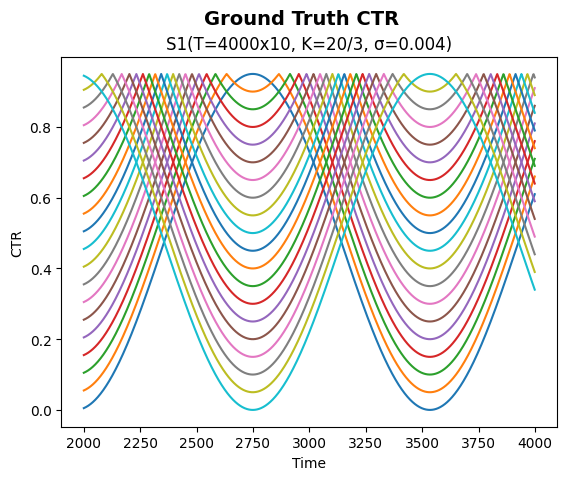

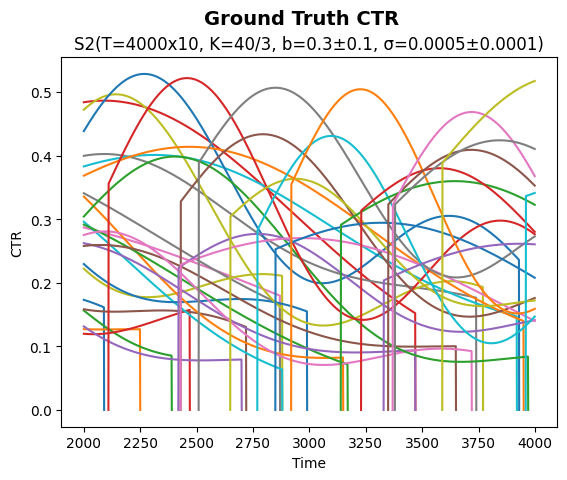

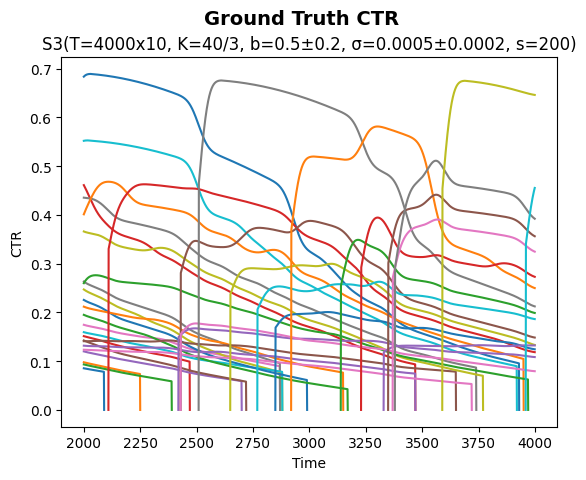

In [42]:
s1 = SimpleSetting(
    SettingConfig(
        episode_count=4000, 
        item_count=20, 
        k=3, 
        episode_length=10
    ),
    evolution_speed=4e-3
)
s1.visualize(tmin=2000)
s2 = NewsSimulationSetting(
    SettingConfig(
        episode_count=4000, 
        item_count=40, 
        k=3, 
        episode_length=10
    ),
    lifetime=2000,
)
s2.visualize(tmin=2000)
s3 = NewsSimulationSetting2(
    SettingConfig(
        episode_count=4000, 
        item_count=40, 
        k=3, 
        episode_length=10
    ),
    lifetime=2000
)
s3.visualize(tmin=2000)

# Multi-seed Simulation

In [9]:
def tune_parameters_TS(sim, setting, window_sizes):
    sim.set_setting(setting)
    sim.run_oracle()
    
    sim.run_agent(ThompsonAgent, {})
    for ws in window_sizes:
        sim.run_agent(ThompsonAgent, {'ws': ws})

In [10]:
sim = Simulator(run_count=25, seed_change_interval=1)

In [18]:
tune_parameters_TS(sim, s1, [100, 1000, 3000, 6000])
tune_parameters_TS(sim, s2, [100, 1000, 3000, 6000])
tune_parameters_TS(sim, s3, [100, 1000, 3000, 6000])

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

 S2(T=4000x10, K=40/3, b=0.3±0.1, σ=0.0005±0.0001) 
     143.0 ±8.3        - SW-TS(ws=6000)
     183.6 ±7.9        - SW-TS(ws=3000)
     287.7 ±24.5       - TS()
     329.4 ±12.9       - SW-TS(ws=1000)
     753.9 ±26.1       - SW-TS(ws=100)

 S3(T=4000x10, K=40/3, b=0.5±0.2, σ=0.0005±0.0002, s=200) 
     119.7 ±8.1        - SW-TS(ws=6000)
     167.7 ±7.8        - SW-TS(ws=3000)
     317.6 ±13.0       - SW-TS(ws=1000)
     373.0 ±32.0       - TS()
    1051.7 ±37.1       - SW-TS(ws=100)

 S1(T=4000x10, K=20/3, σ=0.004) 
     222.9 ±4.4        - SW-TS(ws=3000)
     239.1 ±4.1        - SW-TS(ws=1000)
     299.4 ±7.1        - SW-TS(ws=6000)
     773.1 ±2.5        - SW-TS(ws=100)
    1072.7 ±28.8       - TS()



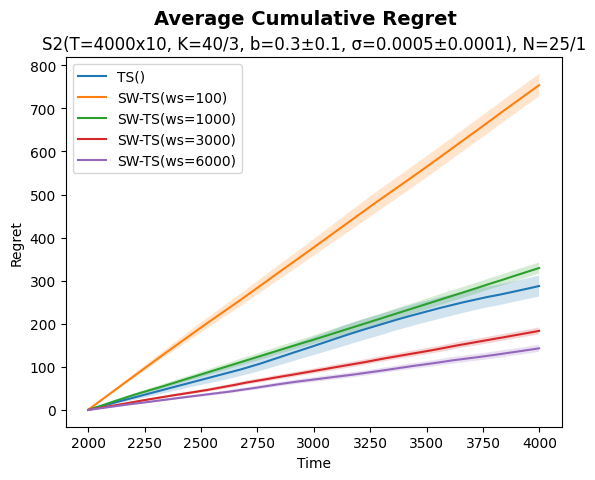

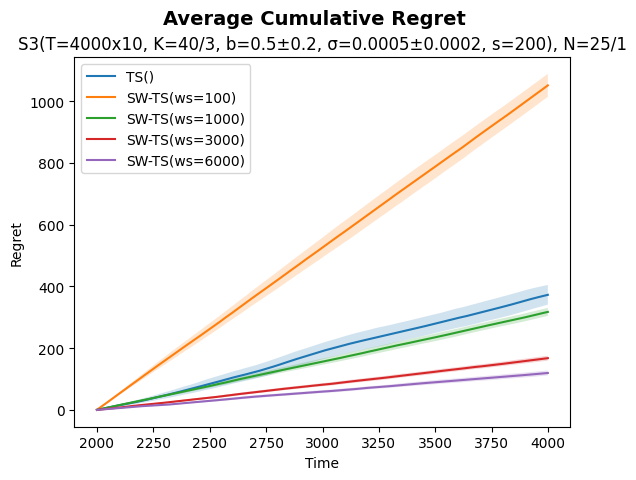

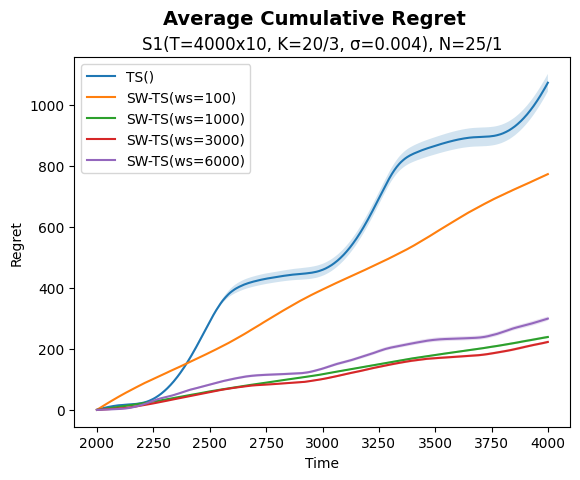

In [21]:
sim.results.rank(tmin=2000)
sim.results.create_regret_plot(tmin=2000)

Note that the window size is globaly per impressions. Since slate size is 3 and epsiode length is 10, 30 impressions are made during each episode.

This means that a window size of 4000 * 30 = 120,000 is needed to fill the entire run.

The behavior between the two simulations is very similar

# Single-seed simulation

In [26]:
sim2 = Simulator(run_count=15, seed_change_interval=0)

In [30]:
tune_parameters_TS(sim2, s2, [100, 1000, 3000, 6000])
tune_parameters_TS(sim2, s3, [100, 1000, 3000, 6000])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

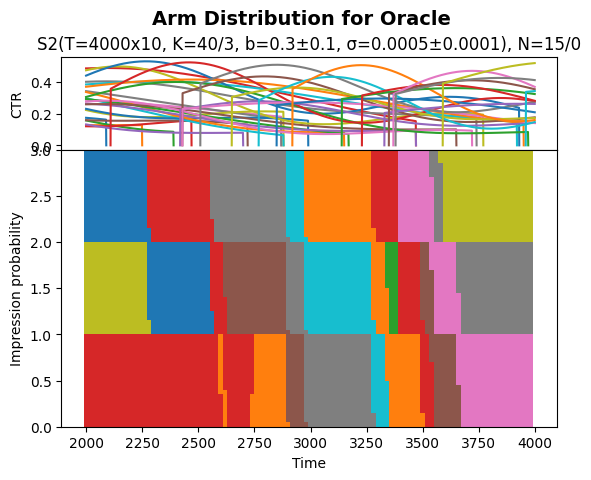

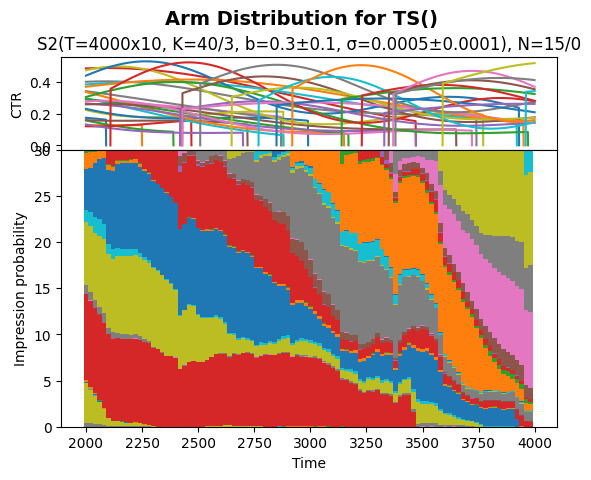

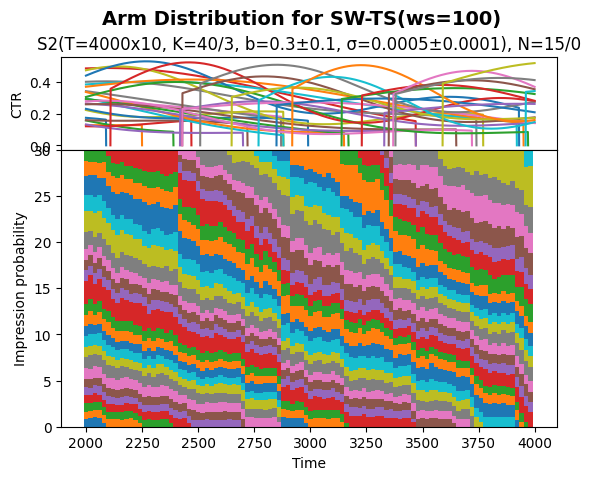

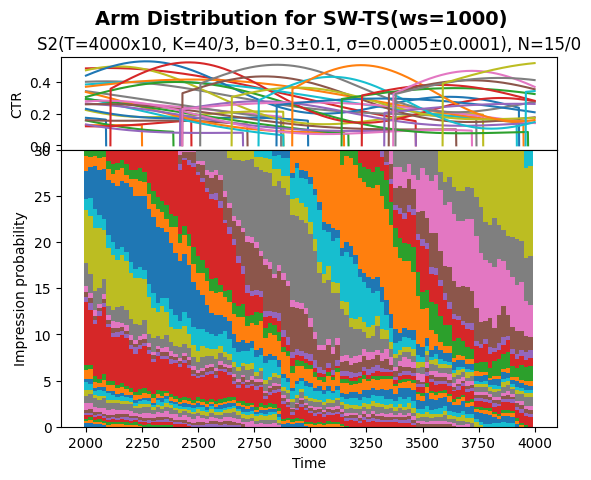

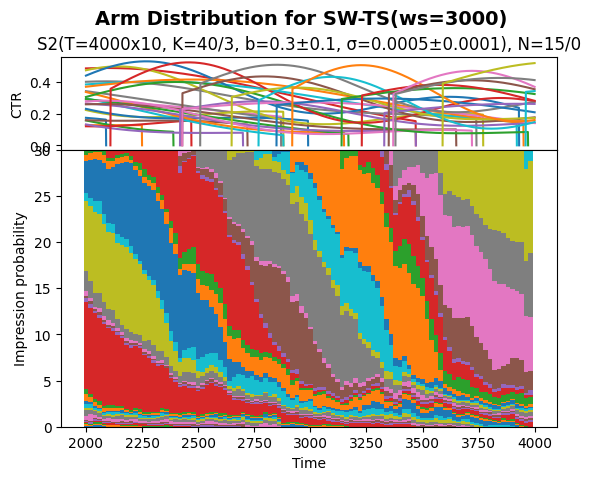

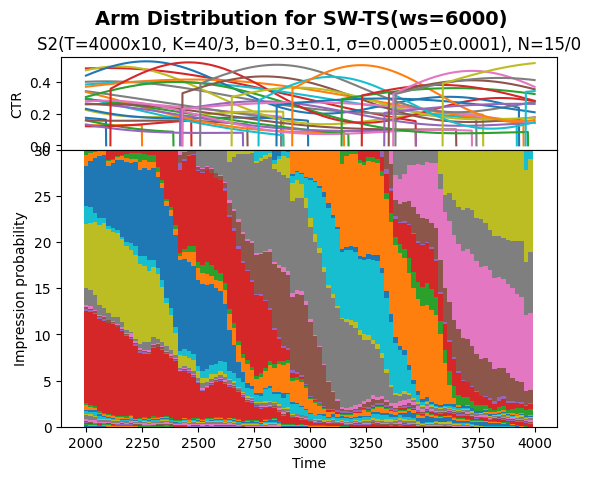

In [37]:
sim2.results.create_impressions_plot(setting=s2.label, tmin=2000)

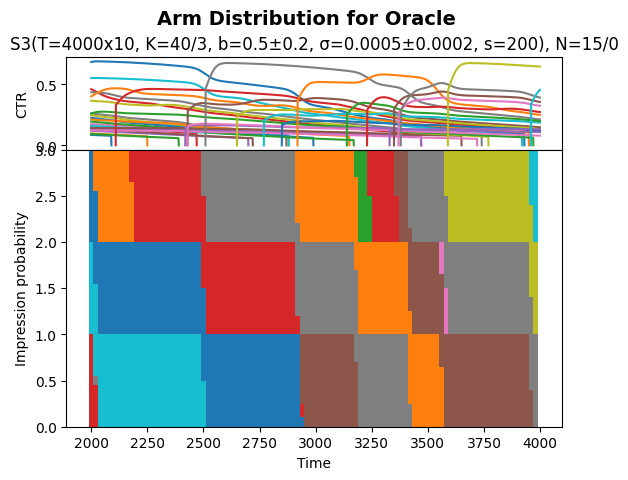

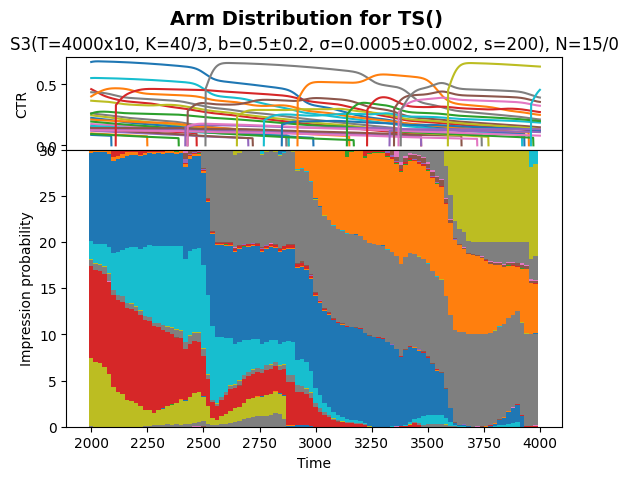

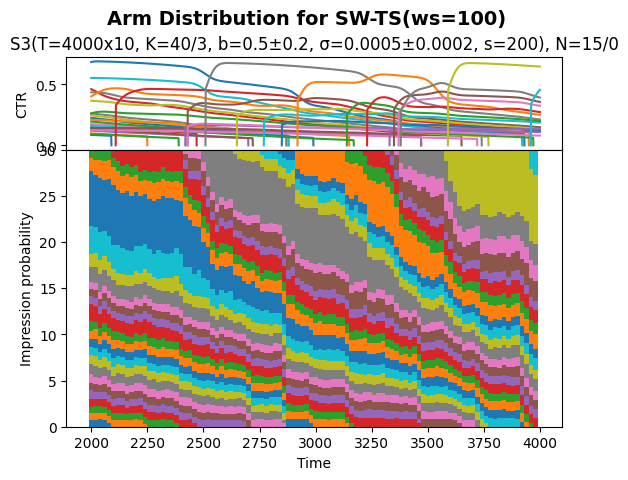

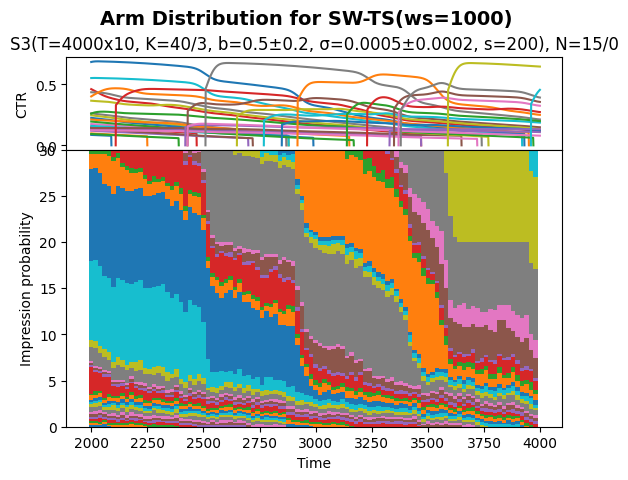

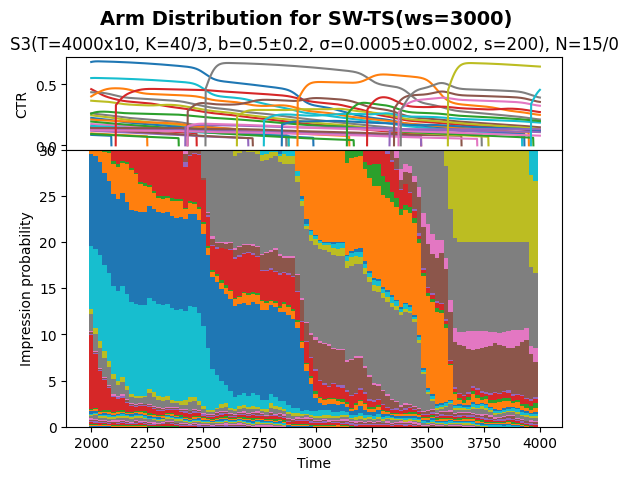

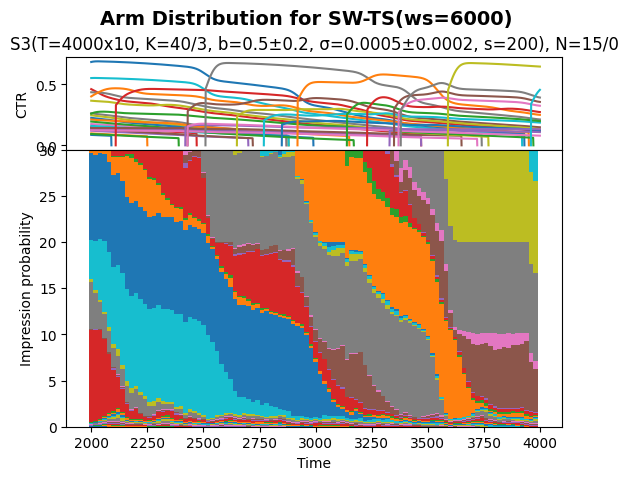

In [38]:
sim2.results.create_impressions_plot(setting=s3.label, tmin=2000)